In [ ]:
# import tensorflow as tf
 
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     # Currently, memory growth needs to be the same across GPUs
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Memory growth must be set before GPUs have been initialized
#     print(e)

## CNN Model 설계 - MNIST 사용 

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
%matplotlib inline

# 컨볼루션 신경망의 설계 
* Input(28x28x1) -> CONV(K:3x3, 32, relu) -> POOL(2x2) -> CONV(K:3x3, 64, relu) -> POOL(2x2) -> CONV(K:3x3, 64, relu) -> Flatten -> FCN(64) -> Output(class:10)

In [ ]:
model = ..........



In [ ]:
model._________

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import ...........

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = ____________(train_labels)
test_labels = ____________(test_labels)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
from keras import optimizers

model.compile(optimizer='rmsprop',
              #optimizer=...............,
              loss='categorical_crossentropy',
              metrics=['acc'])    # 'accuracy'

Using TensorFlow backend.


In [ ]:
%%time
batch_size = 64
history = model.________




Epoch 1/30
750/750 [==============================] - 8s 8ms/step - loss: 0.4450 - acc: 0.8573 - val_loss: 0.0586 - val_acc: 0.9818
Epoch 2/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0585 - acc: 0.9817 - val_loss: 0.0477 - val_acc: 0.9862
Epoch 3/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0379 - acc: 0.9885 - val_loss: 0.0362 - val_acc: 0.9897
Epoch 4/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0290 - acc: 0.9917 - val_loss: 0.0371 - val_acc: 0.9893
Epoch 5/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0205 - acc: 0.9935 - val_loss: 0.0392 - val_acc: 0.9887
Epoch 6/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0143 - acc: 0.9951 - val_loss: 0.0412 - val_acc: 0.9910
Epoch 7/30
750/750 [==============================] - 5s 7ms/step - loss: 0.0134 - acc: 0.9956 - val_loss: 0.0404 - val_acc: 0.9912
Epoch 8/30
750/750 [==============================] - 5s 7ms/step - loss: 0.

## Training Model 저장 
- .h5/.hdf5 : [HDF5(Hierarchical Data Format v5)](https://www.hdfgroup.org/)

In [ ]:
model._____('model_mnist_soot1.h5')  # model.save_weight('model_weight.h5') 

'\nmodel_json = model.to_json()\nwith open("model.json", "w") as json_file : \n    json_file.write(model_json)\n'

## Training/Validation 오류 및 정확도 그래프 그리기

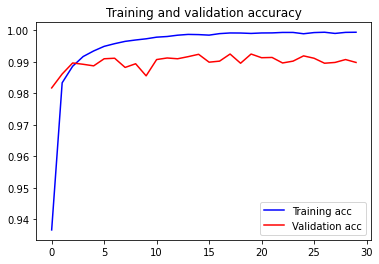

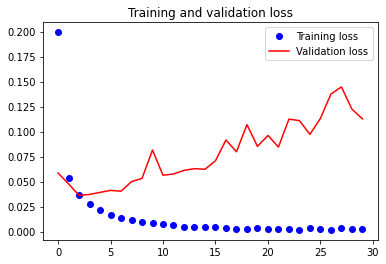

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Test Dataset에 적용하여 모델 평가하기

In [ ]:
test_loss, test_acc = model._________(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)  # 0.9912

313/313 [==============================] - 1s 3ms/step - loss: 0.0939 - acc: 0.9896
test_loss: 0.09391763061285019
test_acc: 0.9896000027656555
